In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
df = pd.read_csv("House Pricing.csv")

In [41]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


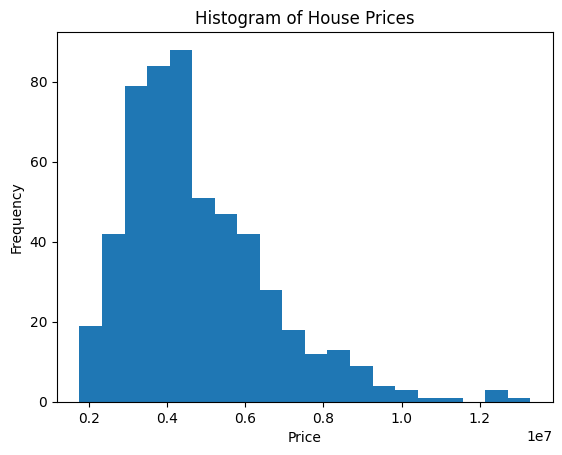

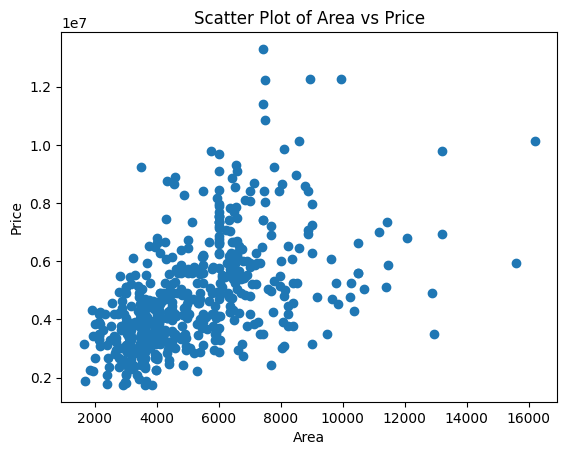

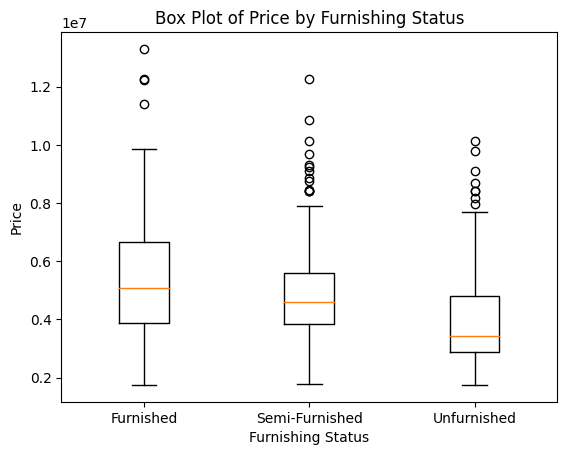

In [42]:
# Plot a histogram of the target variable "price"
plt.hist(df["price"], bins=20)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of House Prices")
plt.show()

# Plot a scatter plot of "area" vs "price"
plt.scatter(df["area"], df["price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Scatter Plot of Area vs Price")
plt.show()

# Plot a box plot of "price" by "furnishingstatus"
plt.boxplot([df[df["furnishingstatus"] == "furnished"]["price"],
             df[df["furnishingstatus"] == "semi-furnished"]["price"],
             df[df["furnishingstatus"] == "unfurnished"]["price"]])
plt.xticks([1, 2, 3], ["Furnished", "Semi-Furnished", "Unfurnished"])
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.title("Box Plot of Price by Furnishing Status")
plt.show()

In [43]:
# change "yes" and "no" values to True and False
bool_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
             'airconditioning', 'prefarea']
df[bool_cols] = df[bool_cols].replace({'yes': True, 'no': False})

# change the 'furnishingstatus' column to a categorical type
df['furnishingstatus'] = pd.Categorical(df['furnishingstatus'], categories=['unfurnished', 'semi-furnished', 'furnished'], ordered=True)

In [78]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
        'basement', 'hotwaterheating', 'airconditioning', 'parking',
        'prefarea', 'furnishingstatus']]
y = df['price']

# convert the categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor with default hyperparameters
gbr = GradientBoostingRegressor()

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gbr.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.6471924840338852


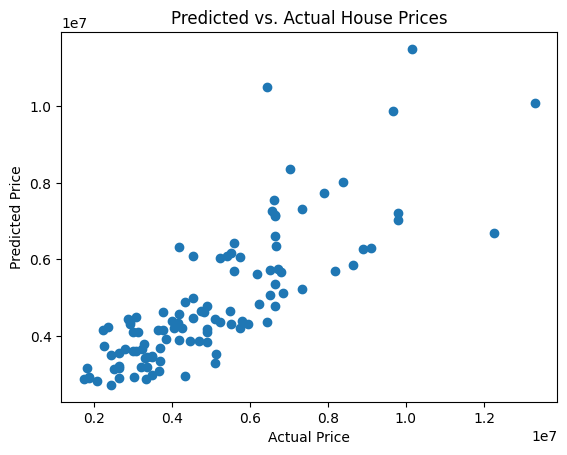

In [45]:
# Plot predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual House Prices')
plt.show()

In [46]:
# Calculate MSE, RMSE, and R2 score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

MSE:  1787417918574.5247
RMSE:  1336943.4986470165
R-squared:  0.6463758872751229
